# K-Nearest_Neighbor

* Supervised learning
* To classify new data, check k closest training examples from new data in data set
* If k=3, new data = Class B, if k=7, new data = Class A

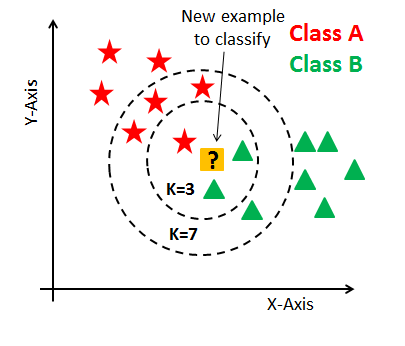

## Content
1. [Data Exploration](#one)
2. [Preprocessing](#two)
3. [Modeling](#three)
4. [Model Test](#four)

<hr>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../input/basketball/basketball_stat.csv')

<a id="one"></a>

# 1. Data Exploration

<hr>

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


## Feature explanation
* Player = name
* Pos = Position
* 3p = 3 point
* 2p = 2 point
* TRB = Rebound
* AST = Assist
* STL = Steal
* BLK = Block

In [4]:
# check how many position there is
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

## Check data with visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SLT and 2P in 2d plane')

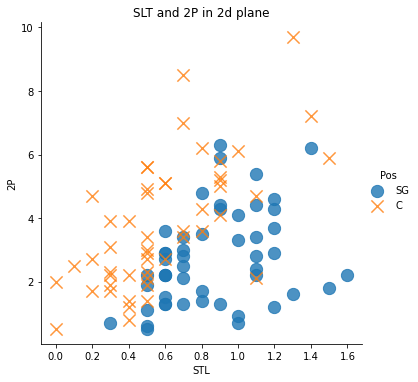

In [5]:
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x, y, data, line
          scatter_kws={"s":150}, # size of dot
          markers=["o","x"],
          hue="Pos") # prediction

plt.title("SLT and 2P in 2d plane") # title

we can find out that these features cant classify 
because boundary is too close

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST and 2P in 2d plane')

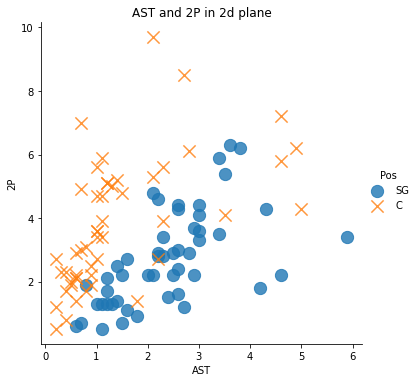

In [6]:
sns.lmplot('AST', '2P', data=df, fit_reg=False, # x, y, data, line
          scatter_kws={"s":150}, # size of dot
          markers=["o","x"],
          hue="Pos") # prediction

plt.title("AST and 2P in 2d plane") # title

we can find out that these features cant classify 
because boundary is too close

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLT and #3P in 2d plane')

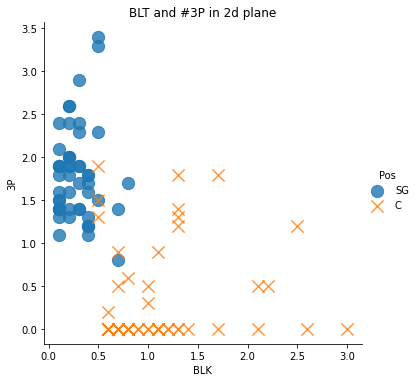

In [7]:
sns.lmplot('BLK', '3P', data=df, fit_reg=False, # x, y, data, line
          scatter_kws={"s":150}, # size of dot
          markers=["o","x"],
          hue="Pos") # prediction

plt.title("BLT and #3P in 2d plane") # title

we can find out that this is useful

<a id="two"></a>

# 2. Preprocessing

<hr>

In [8]:
df.drop(['2P','AST','STL'], axis=1, inplace =True)

delete something useless

In [9]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


## Split data for train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(df,test_size=0.2) # data, 20% for test

In [12]:
print(train.shape[0])
print(test.shape[0])

80
20


<a id="three"></a>

# 3. Modeling

<hr>

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# to find best k parameter, we will do cross validation 
max_k_range = train.shape[0]//2
k_list = []
for i in range(3,max_k_range,2) : # range of k
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

for k in k_list :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.9625,
 0.95,
 0.95,
 0.95,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.8625]

Let's see with visualization

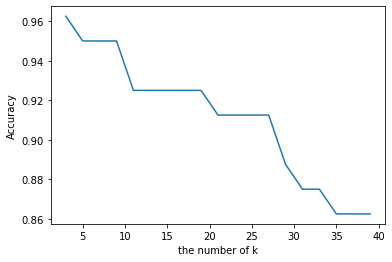

In [14]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

We can find out when k is under 5, Accuracy is highest

In [15]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k : '+str(k))

The best number of k : 3


<a id="four"></a>

# 4. Model Test

<hr>

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [17]:
# training
knn.fit(x_train, y_train.values.ravel())
x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

In [18]:
pred = knn.predict(x_test)
comparison = pd.DataFrame({'prediction':pred,'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,C,SG
3,C,SG
4,SG,SG
5,C,C
6,SG,C
7,C,C
8,SG,SG
9,C,C


## Reference

[My first machine-learning/deep-learning by Minsuk Heo](https://github.com/wikibook/machine-learning/tree/master/data)

[Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)